In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [ ]:
pip install -U matplotlib

     |████████████████████████████████| 10.3MB 35.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [6]:
top_25_peptides = pd.read_csv("./drive/Shareddrives/CSE 291C/Data/data analysis/top_25_peptides.csv", sep=",", thousands=',')
peptides.head()

,Peptidoform,Peptidoform ID,Unmod peptidoform,Total,Total- Unmodified sequence,Peptidoforms- Unmodified sequence,Proteins,Mass,Charge,Num Mods,All Mods,Is Decoy,Lorikeet input,Orig cluster FDR,Pep Prefix,Annotation,Annotation without position,Known,Num mod frags,PValue,% Explained,Rep cluster task,Rep cluster user,Rep cluster index,Num tasks,Rep spectrum filename,Rep spectrum scan,Outlier groups,Outlier group ratio,Outlier groups- unmod,Outlier group ratio- unmod,Unmod_Peptidoform,Patient_01.Timepoint_1,Patient_01.Timepoint_1_unmod,Patient_01.Timepoint_2,Patient_01.Timepoint_2_unmod,Patient_01.Timepoint_3,Patient_01.Timepoint_3_unmod,Patient_01.Timepoint_4,Patient_01.Timepoint_4_unmod,...,Patient_58.Timepoint_6,Patient_58.Timepoint_6_unmod,Patient_58.Timepoint_7,P58,Patient_F1_healthyFemale.Timepoint_1,Patient_F1_healthyFemale.Timepoint_1_unmod,Patient_F1_healthyFemale.Timepoint_2,Patient_F1_healthyFemale.Timepoint_2_unmod,Patient_F1_healthyFemale.Timepoint_3,Patient_F1_healthyFemale.Timepoint_3_unmod,Patient_F2_healthyFemale.Timepoint_1,Patient_F2_healthyFemale.Timepoint_1_unmod,Patient_F2_healthyFemale.Timepoint_2,Patient_F2_healthyFemale.Timepoint_2_unmod,Patient_F2_healthyFemale.Timepoint_3,Patient_F2_healthyFemale.Timepoint_3_unmod,Patient_F3_healthyFemale.Timepoint_1,Patient_F3_healthyFemale.Timepoint_1_unmod,Patient_F3_healthyFemale.Timepoint_2,Patient_F3_healthyFemale.Timepoint_2_unmod,Patient_F3_healthyFemale.Timepoint_3,Patient_F3_healthyFemale.Timepoint_3_unmod,Patient_M1_healthyMale.Timepoint_1,Patient_M1_healthyMale.Timepoint_1_unmod,Patient_M1_healthyMale.Timepoint_2,Patient_M1_healthyMale.Timepoint_2_unmod,Patient_M1_healthyMale.Timepoint_3,Patient_M1_healthyMale.Timepoint_3_unmod,Patient_M2_healthyMale.Timepoint_1,Patient_M2_healthyMale.Timepoint_1_unmod,Patient_M2_healthyMale.Timepoint_2,Patient_M2_healthyMale.Timepoint_2_unmod,Patient_M2_healthyMale.Timepoint_3,Patient_M2_healthyMale.Timepoint_3_unmod,Patient_M3_healthyMale.Timepoint_1,Patient_M3_healthyMale.Timepoint_1_unmod,Patient_M3_healthyMale.Timepoint_2,Patient_M3_healthyMale.Timepoint_2_unmod,Patient_M3_healthyMale.Timepoint_3,Patient_M3_healthyMale.Timepoint_3_unmod
0,.SPLFM+15.995GK.,SPLFM+15.995GK,.SPLFMGK.,11679,11681,2,sp|P01009|A1AT_HUMAN;tr|A0A024R6I7|A0A024R6I7_...,795.4060,2,1,",16,",False,SPLFM+15.995GK,0.00038,SP,"M+16,5[Oxidation]",M+16[Oxidation],UNIMOD,9,4.715,75.1,4e3c96640e534ecdb7053896d6f56f67,batch,205322,55,MSV000080596/ccms_peak/RAW/20150708_QEp1_LC7_P...,10244,.Patient-29.Timepoint-4.,0.17,.Patient-29.Timepoint-4.,0.17,SPLFMGK,2.173878e+09,7.105650e+09,2.197450e+09,7.815675e+09,2.864495e+09,6.870275e+09,1.613750e+09,5.074450e+09,...,4.345225e+09,1.010412e+10,4.934400e+09,1.448808e+10,40479000.0,9.905500e+07,55051000.0,1.146400e+08,51942000.0,1.049000e+08,NaN,1.416500e+08,NaN,34949000.0,NaN,8.363400e+07,NaN,109510000.0,47484000.0,1.068900e+08,7390300.0,NaN,NaN,NaN,21822000.0,NaN,25470000.0,NaN,NaN,1.002900e+08,NaN,8.445300e+07,NaN,9.203200e+07,NaN,NaN,NaN,5.172000e+07,NaN,4.932900e+07
1,.EPQVYTLPPSREEM+15.995TK.,EPQVYTLPPSREEM+15.995TK,.EPQVYTLPPSREEMTK.,11411,13133,46,sp|P01859|IGHG2_HUMAN;sp|P01860|IGHG3_HUMAN;tr...,1920.9381,2,1,",16,",False,EPQVYTLPPSREEM+15.995TK,0.00000,EP,"M+16,14[Oxidation]",M+16[Oxidation],UNIMOD,17,1000.000,68.9,7f92fbf7a8fc4078b8f91140e0ca22a5,batch,84562,52,MSV000080596/ccms_peak/RAW/20150827_QEp1_LC7_P...,13269,.Patient-53.Timepoint-2.,0.25,.Patient-53.Timepoint-2.,0.19,EPQVYTLPPSREEMTK,2.324375e+09,8.126000e+09,2.086445e+09,7.684900e+09,1.523392e+09,6.342200e+09,9.303475e+08,4.613300e+09,...,1.897400e+09,7.559075e+09,2.802800e+09,1.128792e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,.AVM+15.995DDFAAFVEK.,AVM+15.995DDFAAFVEK,.AVMDDFAAFVEK.,10949,18495,81,sp|P02768-2|ALBU_HUMAN;sp|P02768-3|ALBU_HUMAN;...,1358.6318,2,1,",16,",False,AVM+15.995DDFAAFVEK,0.00000,AV,"M+16,3[Oxidation]",M+16[Oxidation],UN

In [4]:
imp_peptides = pd.read_csv("./drive/Shareddrives/CSE 291C/Artifacts/Abs difference model/peptidoforms_with_model_weights_may272021.csv", sep=",", thousands=',')
# print(imp_peptides.head())
imp_peptides = imp_peptides[imp_peptides['model_weight'] != 0]
imp_peptides.sort_values(by=['model_weight'])
print(len(imp_peptides))

186


In [5]:
peptides = pd.read_csv("./drive/Shareddrives/CSE 291C/Data/peptidoforms_intensity/data.tsv", sep="\t", thousands=',')
peptides.head()

,Peptidoform,Peptidoform ID,Unmod peptidoform,Total,Total- Unmodified sequence,Peptidoforms- Unmodified sequence,Proteins,Mass,Charge,Num Mods,All Mods,Is Decoy,Lorikeet input,Orig cluster FDR,Pep Prefix,Annotation,Annotation without position,Known,Num mod frags,PValue,% Explained,Rep cluster task,Rep cluster user,Rep cluster index,Num tasks,Rep spectrum filename,Rep spectrum scan,Outlier groups,Outlier group ratio,Outlier groups- unmod,Outlier group ratio- unmod,Unmod_Peptidoform,Patient_01.Timepoint_1,Patient_01.Timepoint_1_unmod,Patient_01.Timepoint_2,Patient_01.Timepoint_2_unmod,Patient_01.Timepoint_3,Patient_01.Timepoint_3_unmod,Patient_01.Timepoint_4,Patient_01.Timepoint_4_unmod,...,Patient_58.Timepoint_6,Patient_58.Timepoint_6_unmod,Patient_58.Timepoint_7,P58,Patient_F1_healthyFemale.Timepoint_1,Patient_F1_healthyFemale.Timepoint_1_unmod,Patient_F1_healthyFemale.Timepoint_2,Patient_F1_healthyFemale.Timepoint_2_unmod,Patient_F1_healthyFemale.Timepoint_3,Patient_F1_healthyFemale.Timepoint_3_unmod,Patient_F2_healthyFemale.Timepoint_1,Patient_F2_healthyFemale.Timepoint_1_unmod,Patient_F2_healthyFemale.Timepoint_2,Patient_F2_healthyFemale.Timepoint_2_unmod,Patient_F2_healthyFemale.Timepoint_3,Patient_F2_healthyFemale.Timepoint_3_unmod,Patient_F3_healthyFemale.Timepoint_1,Patient_F3_healthyFemale.Timepoint_1_unmod,Patient_F3_healthyFemale.Timepoint_2,Patient_F3_healthyFemale.Timepoint_2_unmod,Patient_F3_healthyFemale.Timepoint_3,Patient_F3_healthyFemale.Timepoint_3_unmod,Patient_M1_healthyMale.Timepoint_1,Patient_M1_healthyMale.Timepoint_1_unmod,Patient_M1_healthyMale.Timepoint_2,Patient_M1_healthyMale.Timepoint_2_unmod,Patient_M1_healthyMale.Timepoint_3,Patient_M1_healthyMale.Timepoint_3_unmod,Patient_M2_healthyMale.Timepoint_1,Patient_M2_healthyMale.Timepoint_1_unmod,Patient_M2_healthyMale.Timepoint_2,Patient_M2_healthyMale.Timepoint_2_unmod,Patient_M2_healthyMale.Timepoint_3,Patient_M2_healthyMale.Timepoint_3_unmod,Patient_M3_healthyMale.Timepoint_1,Patient_M3_healthyMale.Timepoint_1_unmod,Patient_M3_healthyMale.Timepoint_2,Patient_M3_healthyMale.Timepoint_2_unmod,Patient_M3_healthyMale.Timepoint_3,Patient_M3_healthyMale.Timepoint_3_unmod
0,.SPLFM+15.995GK.,SPLFM+15.995GK,.SPLFMGK.,11679,11681,2,sp|P01009|A1AT_HUMAN;tr|A0A024R6I7|A0A024R6I7_...,795.4060,2,1,",16,",False,SPLFM+15.995GK,0.00038,SP,"M+16,5[Oxidation]",M+16[Oxidation],UNIMOD,9,4.715,75.1,4e3c96640e534ecdb7053896d6f56f67,batch,205322,55,MSV000080596/ccms_peak/RAW/20150708_QEp1_LC7_P...,10244,.Patient-29.Timepoint-4.,0.17,.Patient-29.Timepoint-4.,0.17,SPLFMGK,2.173878e+09,7.105650e+09,2.197450e+09,7.815675e+09,2.864495e+09,6.870275e+09,1.613750e+09,5.074450e+09,...,4.345225e+09,1.010412e+10,4.934400e+09,1.448808e+10,40479000.0,9.905500e+07,55051000.0,1.146400e+08,51942000.0,1.049000e+08,NaN,1.416500e+08,NaN,34949000.0,NaN,8.363400e+07,NaN,109510000.0,47484000.0,1.068900e+08,7390300.0,NaN,NaN,NaN,21822000.0,NaN,25470000.0,NaN,NaN,1.002900e+08,NaN,8.445300e+07,NaN,9.203200e+07,NaN,NaN,NaN,5.172000e+07,NaN,4.932900e+07
1,.EPQVYTLPPSREEM+15.995TK.,EPQVYTLPPSREEM+15.995TK,.EPQVYTLPPSREEMTK.,11411,13133,46,sp|P01859|IGHG2_HUMAN;sp|P01860|IGHG3_HUMAN;tr...,1920.9381,2,1,",16,",False,EPQVYTLPPSREEM+15.995TK,0.00000,EP,"M+16,14[Oxidation]",M+16[Oxidation],UNIMOD,17,1000.000,68.9,7f92fbf7a8fc4078b8f91140e0ca22a5,batch,84562,52,MSV000080596/ccms_peak/RAW/20150827_QEp1_LC7_P...,13269,.Patient-53.Timepoint-2.,0.25,.Patient-53.Timepoint-2.,0.19,EPQVYTLPPSREEMTK,2.324375e+09,8.126000e+09,2.086445e+09,7.684900e+09,1.523392e+09,6.342200e+09,9.303475e+08,4.613300e+09,...,1.897400e+09,7.559075e+09,2.802800e+09,1.128792e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,.AVM+15.995DDFAAFVEK.,AVM+15.995DDFAAFVEK,.AVMDDFAAFVEK.,10949,18495,81,sp|P02768-2|ALBU_HUMAN;sp|P02768-3|ALBU_HUMAN;...,1358.6318,2,1,",16,",False,AVM+15.995DDFAAFVEK,0.00000,AV,"M+16,3[Oxidation]",M+16[Oxidation],UN

In [8]:
unmods = top_25_peptides['Unmod peptidoform'].values
unmods = list(set(unmods))
print(len(unmods))
percents = []
for unmod in unmods:
  df = peptides[peptides['Unmod peptidoform'] == unmod]
  vals = df['Peptidoform'].values
  tot = len(set(vals))
  imp_count = len(top_25_peptides[top_25_peptides['Unmod peptidoform'] == unmod].values)
  percents.append(imp_count/tot)

23


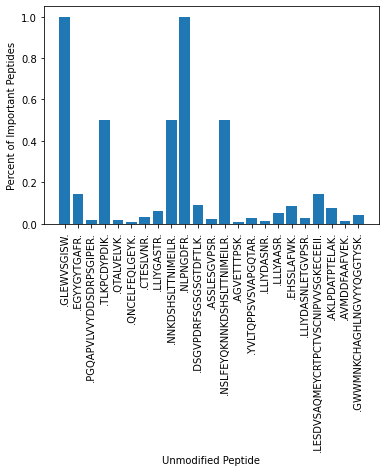

['.GLEWVSGISW.', '.EGYYGYTGAFR.', '.PGQAPVLVVYDDSDRPSGIPER.', '.TLKPCDYPDIK.', '.QTALVELVK.', '.QNCELFEQLGEYK.', '.CTESLVNR.', '.LLIYGASTR.', '.NNKDSHSLTTNIMEILR.', '.NLPNGDFR.', '.DSGVPDRFSGSGSGTDFTLK.', '.ASSLESGVPSR.', '.NSLFEYQKNNKDSHSLTTNIMEILR.', '.AGVETTTPSK.', '.YVLTQPPSVSVAPGQTAR.', '.LLIYDASNR.', '.LLLYAASR.', '.EHSSLAFWK.', '.LLIYDASNLETGVPSR.', '.LESDVSAQMEYCRTPCTVSCNIPVVSGKECEEII.', '.AKLPDATPTELAK.', '.AVMDDFAAFVEK.', '.GWWMNKCHAGHLNGVYYQGGTYSK.']


In [11]:
plt.bar(unmods, percents)
plt.ylabel("Percent of Important Peptides")
plt.xlabel("Unmodified Peptide")
plt.xticks(rotation=90)
plt.show()
print(unmods)

In [ ]:
protein = "sp\|P00736\|C1R_HUMAN"
unmod_peptide = ".NLPNGDFR."

unmods = {}

pep_set = []
df = peptides[peptides['Proteins'].str.contains(protein)]
unmods = dict(zip(df['Peptidoform'], df['Unmod peptidoform']))
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#   print(df[['Peptidoform', 'Unmod peptidoform']].sort_values(by=['Unmod peptidoform']))

for i in range(0, len(unmod_peptide)-5):
  subsequence = unmod_peptide[i:i+5]
  for k,v in unmods.items():
    if subsequence in str(v) and str(k) not in pep_set:
      pep_set.append(str(k))
print(len(df))
print(len(pep_set))

17
1


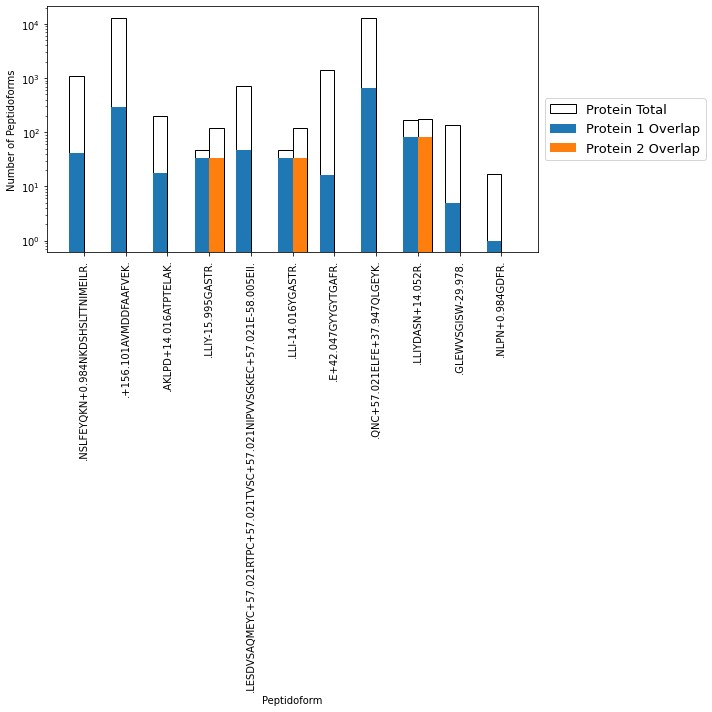

In [ ]:


labels = [".NSLFEYQKN+0.984NKDSHSLTTNIMEILR.", ".+156.101AVMDDFAAFVEK.", ".AKLPD+14.016ATPTELAK.", 
".LLIY-15.995GASTR.", ".LESDVSAQMEYC+57.021RTPC+57.021TVSC+57.021NIPVVSGKEC+57.021E-58.005EII.", 
".LLI-14.016YGASTR.", ".E+42.047GYYGYTGAFR.", ".QNC+57.021ELFE+37.947QLGEYK.",".LLIYDASN+14.052R.",
".GLEWVSGISW-29.978.", ".NLPN+0.984GDFR."]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 10))
overlapping_p1 = [1087, 13115, 203, 48, 701, 48, 1396, 13115, 172, 135,17]
overlapping_p2 = [0,0,0,122,0,122,0,0,174, 0, 0]
rects1 = ax.bar(x - width/2, overlapping_p1, width, label='Protein Total', color="white", edgecolor="black")
rects2 = ax.bar(x + width/2, overlapping_p2, width, label='Protein Total', color="white", edgecolor="black")
overlapping_p1 = [41, 293, 18, 34, 48, 34, 16, 657, 83,5,1]
overlapping_p2 = [0,0,0,34,0,34,0,0,83,0,0]
rects1 = ax.bar(x - width/2, overlapping_p1, width, label='Protein 1 Overlap')
rects2 = ax.bar(x + width/2, overlapping_p2, width, label='Protein 2 Overlap')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Peptidoforms')
ax.set_xlabel('Peptidoform')
ax.set_xticks(x)
plt.yscale("log")
plt.xticks(rotation=90)
ax.set_xticklabels(labels)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:],
          loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 13})
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

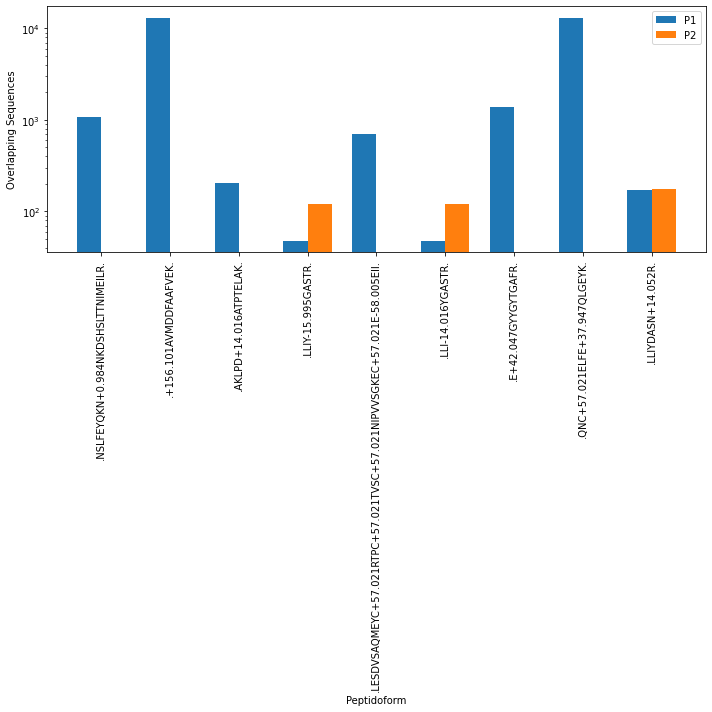

In [ ]:
overlapping_p1 = [1087, 13115, 203, 48, 701, 48, 1396, 13115, 172]
overlapping_p2 = [0,0,0,122,0,122,0,0,174]

labels = [".NSLFEYQKN+0.984NKDSHSLTTNIMEILR.", ".+156.101AVMDDFAAFVEK.", ".AKLPD+14.016ATPTELAK.", 
".LLIY-15.995GASTR.", ".LESDVSAQMEYC+57.021RTPC+57.021TVSC+57.021NIPVVSGKEC+57.021E-58.005EII.", 
".LLI-14.016YGASTR.", ".E+42.047GYYGYTGAFR.", ".QNC+57.021ELFE+37.947QLGEYK.",".LLIYDASN+14.052R."]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, overlapping_p1, width, label='P1')
rects2 = ax.bar(x + width/2, overlapping_p2, width, label='P2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Overlapping Sequences')
ax.set_xlabel('Peptidoform')
ax.set_xticks(x)
plt.yscale("log")
plt.xticks(rotation=90)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
proteins = peptides['Proteins'].values
tot_proteins = []
for p in proteins:
    prots = p.split(";")
    for prot in prots:
      if prot in tot_proteins or "tr|" in prot or "-" in prot:
        continue
      else:
        tot_proteins.append(prot)
print(tot_proteins[:5])
print(len(tot_proteins))

['sp|P01009|A1AT_HUMAN', 'sp|P01859|IGHG2_HUMAN', 'sp|P01860|IGHG3_HUMAN', 'sp|P02768|ALBU_HUMAN', 'sp|P02671|FIBA_HUMAN']
810


In [ ]:
imp_proteins = imp_peptides['Proteins'].values
print(len(imp_proteins))
tot_imp_proteins = []
for p in imp_proteins:
    prots = p.split(";")
    for prot in prots:
      if prot in tot_imp_proteins or "tr|" in prot or "-" in prot:
        continue
      else:
        tot_imp_proteins.append(prot)
print(tot_imp_proteins[:5])
print(len(tot_imp_proteins))

186
['sp|P02768|ALBU_HUMAN', 'sp|P00738|HPT_HUMAN', 'sp|P00739|HPTR_HUMAN', 'sp|P02774|VTDB_HUMAN', 'sp|A0A0A0MRZ8|KVD11_HUMAN']
114


In [ ]:
un

In [ ]:
percents = []
for p in proteins:
  prots = p.split(";")
  count = 0
  in_set = 0
  for prot in prots:
    if "tr|" in prot or "-" in prot:
      continue
    else:
      count += 1
      if prot in tot_imp_proteins:
        in_set += 1
  if count != 0:
    percents.append(in_set/count)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

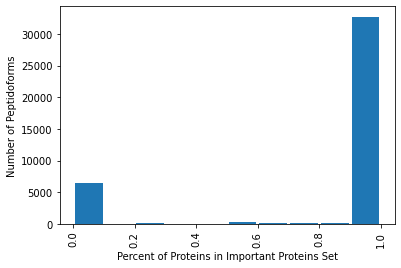

In [ ]:
fig = plt.figure()
plt.hist(percents, rwidth=0.9)
plt.ylabel("Number of Peptidoforms")
plt.xlabel("Percent of Proteins in Important Proteins Set")
plt.xticks(rotation=90)

In [ ]:
percents = []
prots_arr = []
tot_arr = []
imp_pep_prots = imp_peptides['Proteins'].values
all_pep_prots = peptides['Proteins'].values

tot_prots = []
for p in tot_imp_proteins:
    sp = p.split("|")
    if len(sp) > 1:
      tot_prots.append(sp[1])
    else:
      tot_prots.append(sp[0])

for p in tot_prots:
  count = 0
  tot = 0
  for imp_p in imp_pep_prots:
    if "sp|" + p in imp_p:
      count += 1
  for p2 in all_pep_prots:
    if "sp|" + p in p2:
      tot += 1
  percents.append(count/tot)
  if tot < 6000:
    tot_arr.append(tot)
    prots_arr.append(p)


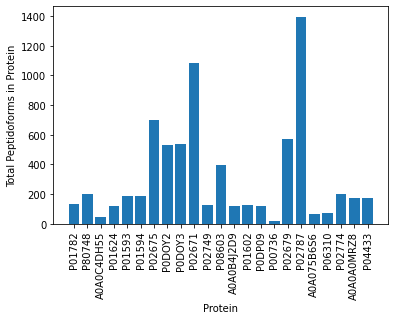

In [ ]:
plt.bar(prots_arr, tot_arr)
plt.ylabel("Total Peptidoforms in Protein")
plt.xlabel("Protein")
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_25_pep_id = pd.read_csv("./drive/Shareddrives/CSE 291C/Data/data analysis/top_25_pep_id_6.tsv", sep="\t", thousands=',')
top_25_pep_id.head()

,model_weight,Peptidoform,Peptidoform ID,Unmod peptidoform,Peptide USI,Comparison USI,Proteins,Proteins Cleaned,Protein Set,Protein Type,PValue,Annotation without position,Annotation without position.1,Charge,B-Ion Match,Y-Ion Match,B-Ion Match Max,Y-Ion Match Max,Cosine Similarity,Unnamed: 19
0,0.228511,.GLEWVSGISW-29.978.,GLEWVSGISW-29.978,.GLEWVSGISW.,mzspec:MassIVE:TASK-a2e4c0414720468bad29d9ae49...,No other peptides,sp|P01782|HV309_HUMAN,P01782,P01782,Immunoglobulins,0.000,W-30[W->R/1],W->R/1,2.0,5,8,5.0,8.0,NaN,NaN
1,0.073149,.P-10.021GQAPVLVVYDDSDRPSGIPER.,P-10.021GQAPVLVVYDDSDRPSGIPER,.PGQAPVLVVYDDSDRPSGIPER.,mzspec:MassIVE:TASK-55d23dda49114c1ea7abfbd938...,mzspec:MassIVE:TASK-d5183f8a00c4425fad55dff110...,sp|P80748|LV302_HUMAN,P80748,P80748,Immunoglobulins,34.215,P-10[P->S/1],P->S/1,3.0,8,"2, 8",8.0,8.0,0.9776,NaN
2,0.066153,.LLIY-15.995GASTR.,LLIY-15.995GASTR,.LLIYGASTR.,mzspec:MassIVE:TASK-b218f854c1e64b628a426c402e...,mzspec:MassIVE:TASK-55d23dda49114c1ea7abfbd938...,sp|A0A0C4DH55|KVD07_HUMAN;sp|P01624|KV315_HUMAN,"A0A0C4DH55,P01624",A0A0C4DH55,Immunoglobulins,1000.000,Y-16[Y->F/1],Y->F/1,2.0,2,8,2.0,8.0,0.9689,NaN
3,0.042998,.L-14.016LIYDASNLETGVPSR.,L-14.016LIYDASNLETGVPSR,.LLIYDASNLETGVPSR.,mzspec:MassIVE:TASK-3183ea7bf6fd42af9ea286df40...,mzspec:MassIVE:TASK-75cdc58ad4bd435eadb26ca695...,sp|P01593|KVD33_HUMAN;sp|P01594|KV102_HUMAN;tr...,"P01593, P01594",P01624,Immunoglobulins,16.336,L-14[L->V/1],L->V/1,2.0,8,14,8.0,14.0,0.8959,NaN
4,0.041673,.+57.021QTALVELVK.,+57.021QTALVELVK,.QTALVELVK.,mzspec:MassIVE:TASK-55d23dda49114c1ea7abfbd938...,mzspec:MassIVE:TASK-e46a819609e34ede93abac9abd...,sp|P02768|ALBU_HUMAN,P02768,P01593,Albumin,1000.000,X+57[Carbamidomethyl],Carbamidomethyl,2.0,"3, 4",8,4.0,8.0,0.8301,NaN


['.GLEWVSGISW-29.978.' '.P-10.021GQAPVLVVYDDSDRPSGIPER.'
 '.LLIY-15.995GASTR.' '.L-14.016LIYDASNLETGVPSR.' '.+57.021QTALVELVK.'
 '.+43.006C+58.005TESLVNR.'
 '.LESDVSAQMEYC+57.021RTPC+57.021TVSC+57.021NIPVVSGKEC+57.021E-58.005EII.'
 '.LLLYAA-14.016SR.' '.AGVETTTPS-15.995K.'
 '.NSLFEYQKN+0.984NKDSHSLTTNIMEILR.' '.EHSSLAFW-99.047K.'
 '.LLIY-76.031DASNLETGVPSR.' '.YVLTQPPSVSVAPGQTAR-28.006.'
 '.+27.995TLKP+15.995C+57.021DYPDIK.' '.ASS+26.052LESGVPSR.'
 '.NLPN+0.984GDFR.' '.+27.995GWWM+15.995NKC+57.021HAGHLNGVYYQGGTYSK.'
 '.LLI-14.016YGASTR.' '.E+42.047GYYGYTGAFR.' '.NNK+57.021DSHSLTTNIMEILR.'
 '.QNC+57.021ELFE+37.947QLGEYK.' '.+156.101AVMDDFAAFVEK.'
 '.DSGVPDRFSGSGSGT-14.016DFTLK.' '.AKLPD+14.016ATPTELAK.'
 '.LLIYDASN+14.052R.']
['P01782', 'P80748', 'A0A0C4DH55', 'P01624', 'P01593', 'P01594', 'P02768', 'P02675', 'P0DOY2', 'P0DOY3', 'P02671', 'P02749', 'P08603', 'A0A0B4J2D9', 'P01602', 'P0DP09', 'P00736', 'P02679', 'P02787', 'A0A075B6S6', 'P06310', 'P02774', 'A0A0A0MRZ8', 'P04433']
length 2

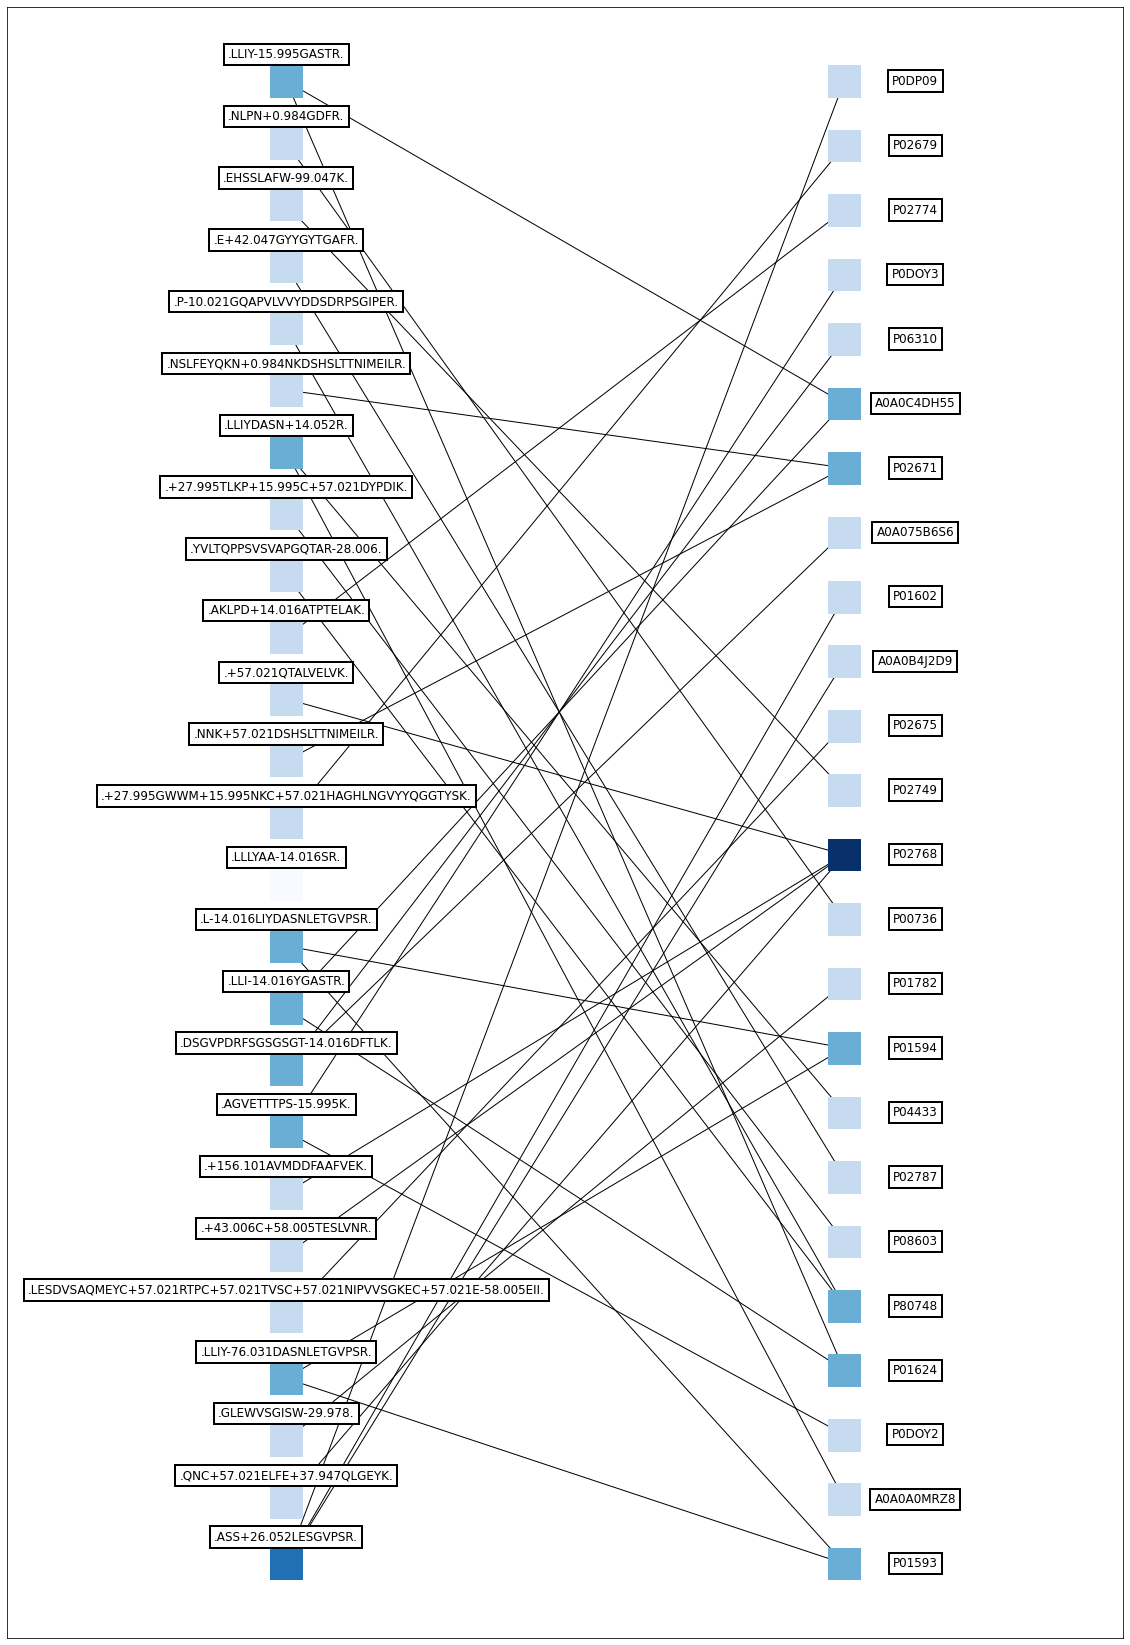

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.colors as mcolors
peptides = top_25_pep_id['Peptidoform'].astype(str).values
peptides = peptides[:-7]
proteins = top_25_pep_id['Protein Set'].astype(str).values
proteins_2 = top_25_pep_id['Proteins Cleaned'].astype(str).values
proteins = tot_imp_proteins
tot_prots = []
print(peptides)
for p in proteins:
    sp = p.split("|")
    if len(sp) > 1:
      tot_prots.append(sp[1])
    else:
      tot_prots.append(sp[0])
print(tot_prots)
B = nx.Graph()
B.add_nodes_from(peptides, bipartite=0)
B.add_nodes_from(tot_prots, bipartite=1)

edges = []
for i in range(len(peptides)):
    prots = proteins_2[i].split(",")
    for p in prots:
      if p == 'nan' or p =='33 total proteins':
        continue
      if p[0] == ' ':
        p = p[1:]
      edges.append((peptides[i], p))
B.add_edges_from(edges)
top = peptides
pos = nx.bipartite_layout(B, top, scale=0.2, aspect_ratio=1)

altered_pos = {}
count_prots = 0
for k, v in pos.items():
  if v[0] < 0:
    count_prots+= 1
    altered_pos[k] = (v[0], v[1]+0.007)
  else:
    altered_pos[k] = (v[0] + 0.05, v[1])
print("length", count_prots)

# plt.figure(3,figsize=(20,20)) 
# nx.draw_networkx(B,with_labels = True, node_size = 1000,pos=pos)
fig, ax = plt.subplots(figsize=(20,30))
degrees = B.degree() #Dict with Node ID, Degree
nodes = B.nodes()

for n in nodes:
  if n not in tot_prots:
    print(n)

print(tot_prots)

n_color = np.asarray([degrees[n] for n in nodes])
names = np.asarray([n for n in nodes])
# print(altered_pos)
plt.margins(x=0.5)
sc = nx.draw_networkx(B, pos=pos, nodelist=nodes, node_color=n_color, cmap='Blues', with_labels=False,
                            ax=ax, node_size=1000, node_shape='s')
nx.draw_networkx_labels(B, altered_pos, bbox=dict(boxstyle="square,pad=0.35", fc="white", ec="black", lw=2))

# use a log-norm, do not see how to pass this through nx API
# just set it after-the-fact
# sc.set_norm(mcolors.LogNorm())
# fig.colorbar(sc)

plt.show()

['Immunoglobulins' 'Immunoglobulins' 'Immunoglobulins' 'Immunoglobulins'
 'Albumin' 'Albumin' 'Fibrinogen beta chain' 'nan' 'Immunoglobulins'
 'Fibrinogen beta chain' 'Beta-2-glycoprotein 1' 'Immunoglobulins'
 'Immunoglobulins' 'Complement factor H' 'Immunoglobulins'
 'Complement C1r subcomponent' 'Fibrinogen gamma chain' 'Immunoglobulins'
 'Serotransferrin' 'Fibrinogen alpha chain' 'Albumin' 'Albumin'
 'Immunoglobulins' 'Vitamin D-binding protein' 'Immunoglobulins']
['Immunoglobulins' 'Immunoglobulins' 'Immunoglobulins' 'Immunoglobulins'
 'Albumin' 'Albumin' 'Fibrinogen beta chain' 'Immunoglobulins'
 'Fibrinogen beta chain' 'Beta-2-glycoprotein 1' 'Immunoglobulins'
 'Immunoglobulins' 'Complement factor H' 'Immunoglobulins'
 'Complement C1r subcomponent' 'Fibrinogen gamma chain' 'Immunoglobulins'
 'Serotransferrin' 'Fibrinogen alpha chain' 'Albumin' 'Albumin'
 'Immunoglobulins' 'Vitamin D-binding protein' 'Immunoglobulins']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

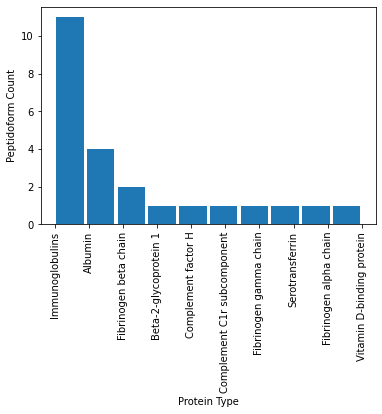

In [ ]:
top_25_pep_id['Protein Type'] = top_25_pep_id['Protein Type'].astype(str)

vals = top_25_pep_id['Protein Type'].dropna().values
vals = vals[:25]
print(vals)
vals = np.delete(vals, 7)
print(vals)
fig = plt.figure()
plt.hist(vals, rwidth=0.9)
plt.ylabel("Peptidoform Count")
plt.xlabel("Protein Type")
plt.xticks(rotation=90)

Counter({'Immunoglobulins': 11, 'Albumin': 4, 'Fibrinogen beta chain': 2, 'Beta-2-glycoprotein 1': 1, 'Complement factor H': 1, 'Complement C1r subcomponent': 1, 'Fibrinogen gamma chain': 1, 'Serotransferrin': 1, 'Fibrinogen alpha chain': 1, 'Vitamin D-binding protein': 1})


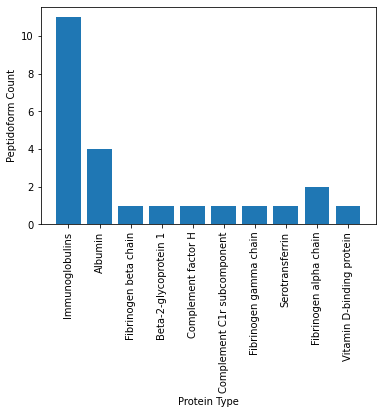

In [ ]:
from collections import Counter

# Use a Counter to count the number of instances in x
c = Counter(vals)
print(c)
c['Fibrinogen beta chain'] = 1
c['Fibrinogen alpha chain'] = 2

plt.bar(c.keys(), c.values())
plt.ylabel("Peptidoform Count")
plt.xlabel("Protein Type")
plt.xticks(rotation=90)
plt.show()

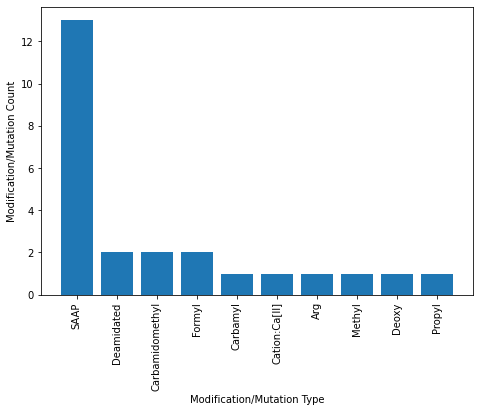

In [13]:
x=["SAAP", "Deamidated", "Carbamidomethyl", "Formyl", "Carbamyl", "Cation:Ca[II]", "Arg", "Methyl", "Deoxy", "Propyl"]
y=[13, 2, 2, 2, 1, 1, 1, 1, 1, 1]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y)
ax.set_ylabel("Modification/Mutation Count")
ax.set_xlabel("Modification/Mutation Type")
plt.xticks(rotation=90)
plt.show()

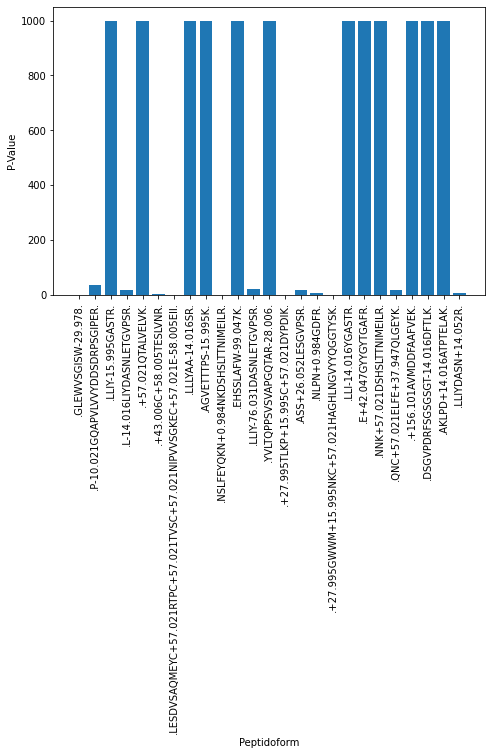

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
df_sub = top_25_pep_id[['Peptidoform', 'PValue']].dropna()
ax.bar(df_sub['Peptidoform'].astype(str).values, df_sub['PValue'].values)
ax.set_ylabel("P-Value")
ax.set_xlabel("Peptidoform")
plt.xticks(rotation=90)
plt.show()

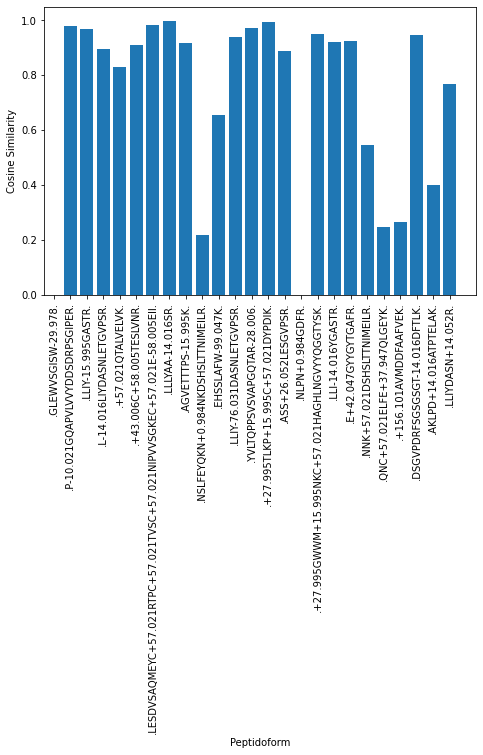

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(top_25_pep_id['Peptidoform'].values, top_25_pep_id['Cosine Similarity'].values)
ax.set_ylabel("Cosine Similarity")
ax.set_xlabel("Peptidoform")
plt.xticks(rotation=90)
plt.show()

In [ ]:
b_ions = top_25_pep_id['B-Ion Match Max'].values
y_ions = top_25_pep_id['Y-Ion Match Max'].values

b_ions[0] = 5
y_ions[0] = 8
print(b_ions)
print(y_ions)

[ 5.  8.  2.  8.  4.  4.  5.  3.  3. 13.  8.  8.  5.  3.  6.  3.  4.  2.
  2.  8.  2.  9.  9.  6.  1.]
[ 8.  8.  8. 14.  8.  7.  1.  4.  9. 14.  8. 15. 12.  6. 10.  6. 15.  8.
 10.  6.  6.  9.  7. 11.  7.]


In [ ]:
figure(num=1, figsize=(80, 6), dpi=80)

<Figure size 6400x480 with 0 Axes>

<Figure size 6400x480 with 0 Axes>

25 25


<Figure size 7200x7200 with 0 Axes>

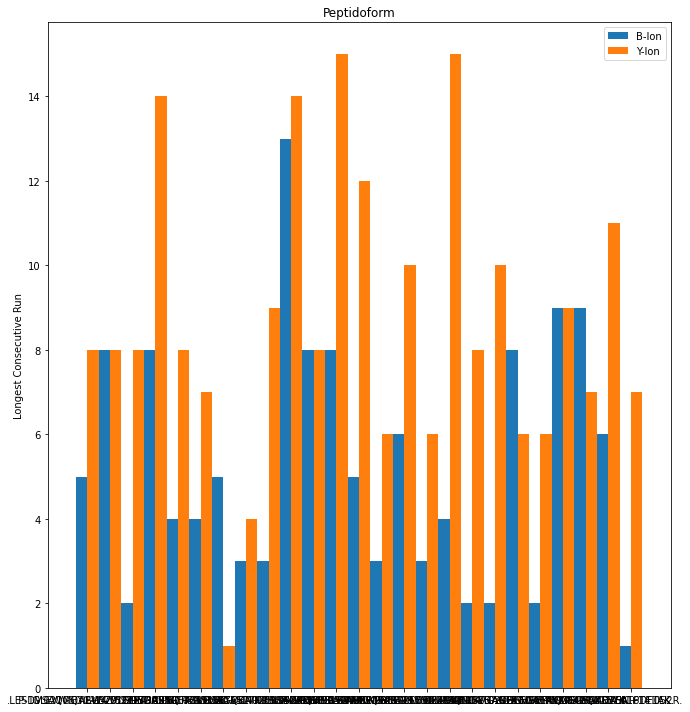

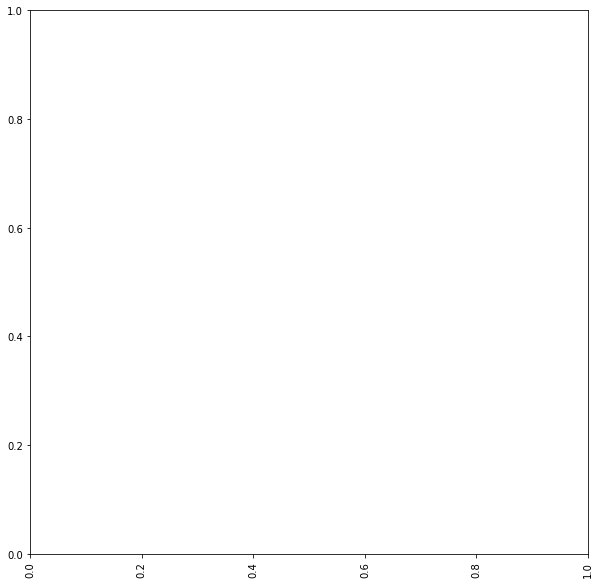

In [ ]:
labels = top_25_pep_id['Peptidoform'].values
plt.figure(figsize=(100,100))
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(10,10))
plt.figure(figsize=(10,10))
width = 0.5
print(len(x), len(b_ions))
rects1 = ax.bar(x - width/2, b_ions, width, label='B-Ion')
rects2 = ax.bar(x + width/2, y_ions, width, label='Y-Ion')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Longest Consecutive Run')
ax.set_title('Peptidoform')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

plt.xticks(rotation=90)

fig.tight_layout()



plt.show()

No handles with labels found to put in legend.


AttributeError: ignored

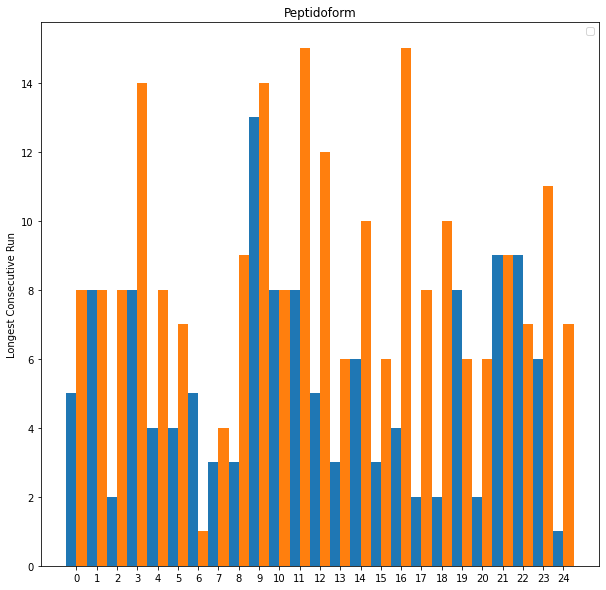

In [ ]:
x = np.arange(25)
y1 = [34, 56, 12, 89, 67]
y2 = [12, 56, 78, 45, 90]
width = 0.5
plt.figure(figsize=(10,10))
  
# plot data in grouped manner of bar type
plt.bar(x-0.25, b_ions, width)
plt.bar(x+0.25, y_ions, width)

plt.legend()
plt.ylabel('Longest Consecutive Run')
plt.title('Peptidoform')
plt.xticks(x)
plt.xticklabels(labels)

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

plt.xticks(rotation=90)

fig.tight_layout()

plt.show()

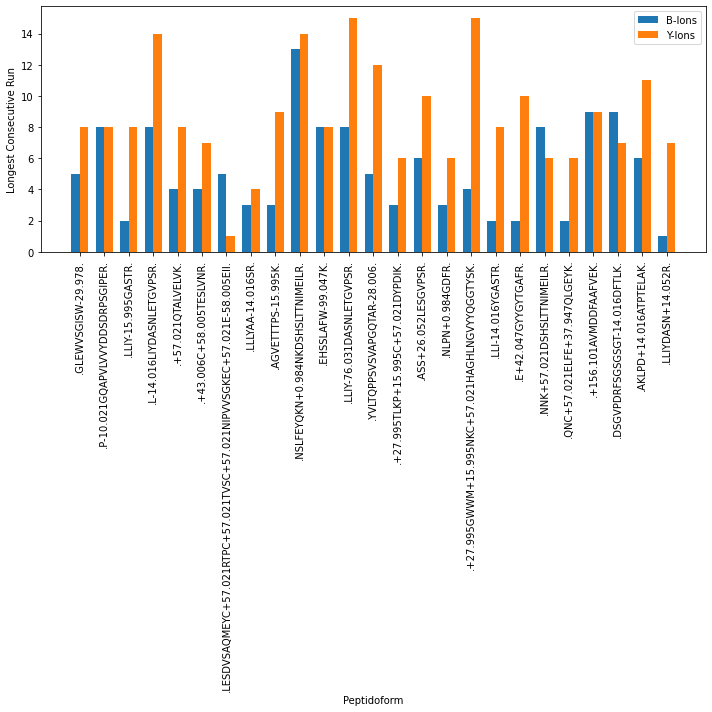

In [ ]:
labels = top_25_pep_id['Peptidoform'].values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, b_ions, width, label='B-Ions')
rects2 = ax.bar(x + width/2, y_ions, width, label='Y-Ions')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Longest Consecutive Run')
ax.set_xlabel('Peptidoform')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
Spectral_Consistency = pd.read_csv("./drive/Shareddrives/CSE 291C/Data/Spectral_Consistency.tsv", sep="\t", thousands=',')
Spectral_Consistency.head()

,Peptidoform,Peptidoform ID,Unmod peptidoform,USI,COS,Unnamed: 5,Unnamed: 6,Charge,Settings:,Unnamed: 9,Unnamed: 10
0,.AGVE-58.005TTTPSK.,AGVE-58.005TTTPSK,.AGVETTTPSK.,mzspec:MassIVE:TASK-7f92fbf7a8fc4078b8f91140e0...,0.5760,NaN,NaN,2,Cosine,Shifted,NaN
1,.AGVETTTPS-15.995K.,AGVETTTPS-15.995K,.AGVETTTPSK.,mzspec:MassIVE:TASK-9b5d5744fc414829a884ae0ab6...,NaN,NaN,NaN,2,Fragment Tolerance,0.05,NaN
2,.AVM+15.995DDFAAFVEK.,AVM+15.995DDFAAFVEK,.AVMDDFAAFVEK.,mzspec:MassIVE:TASK-7f92fbf7a8fc4078b8f91140e0...,0.2064,NaN,NaN,2,NaN,NaN,NaN
3,.+156.101AVMDDFAAFVEK.,+156.101AVMDDFAAFVEK,.AVMDDFAAFVEK.,mzspec:MassIVE:TASK-c0f81134aa664ab191f9aaac2b...,NaN,NaN,NaN,3,NaN,NaN,NaN
4,.+12.000C+57.021TESLVNR.,+12.000C+57.021TESLVNR,.CTESLVNR.,mzspec:MassIVE:TASK-7f92fbf7a8fc4078b8f91140e0...,0.9081,NaN,NaN,2,NaN,NaN,NaN


In [ ]:
Spectral_Consistency_2 = pd.read_csv("./drive/Shareddrives/CSE 291C/Data/Spectral_Consistency_2.tsv", sep="\t", thousands=',')
Spectral_Consistency_2.head()

,Unmod peptidoform,COS
0,.AGVETTTPSK.,0.5760
1,.AVMDDFAAFVEK.,0.2064
2,.CTESLVNR.,0.9081
3,.DDNPNLPR.,0.2925
4,.DSGVPDRFSGSGSGTDFTLK.,0.0213


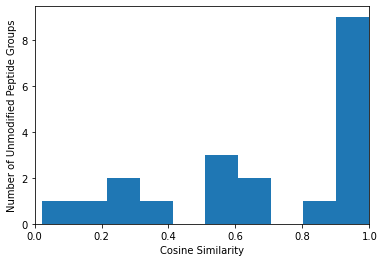

In [ ]:
plot = Spectral_Consistency_2.plot(x="Unmod peptidoform",y="COS",kind="hist")
plot.set_xlabel("Cosine Similarity")
plot.set_ylabel("Number of Unmodified Peptide Groups")
plot.set_xlim([0, 1])
plot.get_legend().remove()

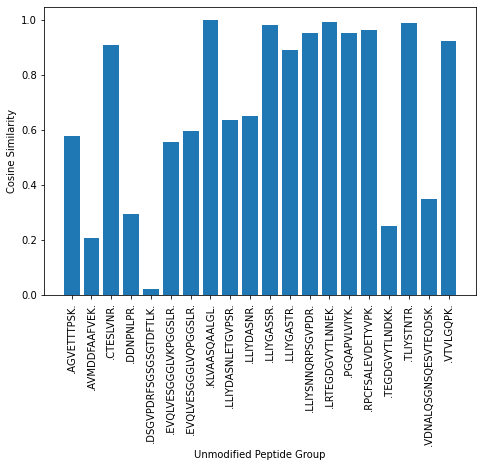

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Spectral_Consistency_2['Unmod peptidoform'].values, Spectral_Consistency_2['COS'].values)
ax.set_ylabel("Cosine Similarity")
ax.set_xlabel("Unmodified Peptide Group")
plt.xticks(rotation=90)
plt.show()

In [ ]:
Spectral_Consistency_3 = pd.read_csv("./drive/Shareddrives/CSE 291C/Data/Spectral_Consistency_3.tsv", sep="\t", thousands=',')
Spectral_Consistency_3.head()

,Unmod peptidoform,COS,Updated COS
0,.AGVETTTPSK.,0.5760,0.5760
1,.AVMDDFAAFVEK.,0.2064,0.9537
2,.CTESLVNR.,0.9081,0.9081
3,.DDNPNLPR.,0.2925,0.2925
4,.DSGVPDRFSGSGSGTDFTLK.,0.0213,0.9489


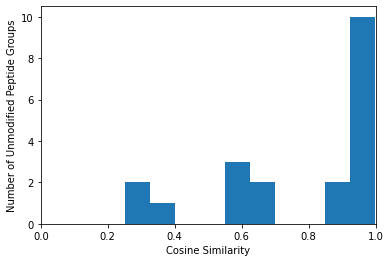

In [ ]:
plot = Spectral_Consistency_3.plot(x="Unmod peptidoform",y="Updated COS",kind="hist")
plot.set_xlabel("Cosine Similarity")
plot.set_ylabel("Number of Unmodified Peptide Groups")
plot.set_xlim([0, 1])
plot.get_legend().remove()

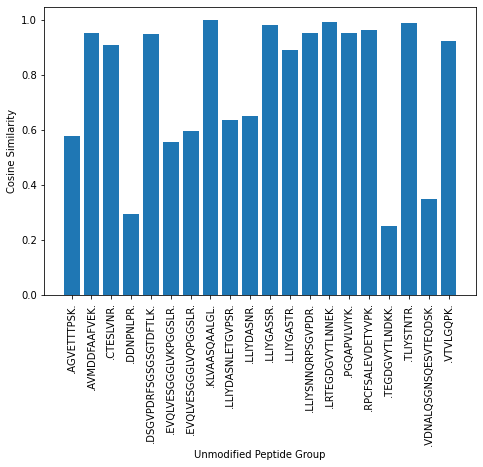

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Spectral_Consistency_3['Unmod peptidoform'].values, Spectral_Consistency_3['Updated COS'].values)
ax.set_ylabel("Cosine Similarity")
ax.set_xlabel("Unmodified Peptide Group")
plt.xticks(rotation=90)
plt.show()

In [ ]:
all_peps_weights = pd.read_csv("./drive/Shareddrives/CSE 291C/Artifacts/Abs difference model/peptidoforms_with_model_weights_may272021.csv", sep=",", thousands=',')
# all_peps_weights.head()
all_peps_weights.columns

Index(['Peptidoform', 'Peptidoform ID', 'Unmod peptidoform', 'Total',
       'Total- Unmodified sequence', 'Peptidoforms- Unmodified sequence',
       'Proteins', 'Mass', 'Charge', 'Num Mods',
       ...
       'Patient_57.Timepoint_6', 'Patient_57.Timepoint_7',
       'Patient_58.Timepoint_1', 'Patient_58.Timepoint_2',
       'Patient_58.Timepoint_3', 'Patient_58.Timepoint_4',
       'Patient_58.Timepoint_5', 'Patient_58.Timepoint_6',
       'Patient_58.Timepoint_7', 'model_weight'],
      dtype='object', length=351)

In [ ]:
top_peps = all_peps_weights[all_peps_weights['model_weight'] != 0]
print(len(top_peps))

186


In [ ]:
cols = top_peps.columns.tolist()
print(cols[-1])
cols = [cols[-1]] + cols[:-1]
print(cols[0])
top_peps = top_peps[cols]

model_weight
model_weight


In [ ]:
top_peps.to_csv("./drive/Shareddrives/CSE 291C/Data/top_peptides_weights.csv")

NameError: ignored

In [ ]:
spec_consistency_weights = pd.read_csv("./drive/Shareddrives/CSE 291C/Data/spectral_consistency_weights.csv", sep=",", thousands=',')

In [ ]:
top_peps = pd.read_csv("./drive/Shareddrives/CSE 291C/Data/top_peptides_weights.csv", sep=",", thousands=',')

In [ ]:
sorted_peps = top_peps.sort_values(by=['model_weight'], ascending=False)

In [ ]:
top_25 = sorted_peps.head(25)

In [ ]:
print(len(top_25))
top_25.head()

25


,Unnamed: 0,model_weight,Peptidoform,Peptidoform ID,Unmod peptidoform,Total,Total- Unmodified sequence,Peptidoforms- Unmodified sequence,Proteins,Mass,Charge,Num Mods,All Mods,Is Decoy,Lorikeet input,Orig cluster FDR,Pep Prefix,Annotation,Annotation without position,Known,Num mod frags,PValue,% Explained,Rep cluster task,Rep cluster user,Rep cluster index,Num tasks,Rep spectrum filename,Rep spectrum scan,Outlier groups,Outlier group ratio,Outlier groups- unmod,Outlier group ratio- unmod,Unmod_Peptidoform,Patient_01.Timepoint_1,Patient_01.Timepoint_2,Patient_01.Timepoint_3,Patient_01.Timepoint_4,Patient_01.Timepoint_5,Patient_01.Timepoint_6,...,Patient_47.Timepoint_6,Patient_47.Timepoint_7,Patient_48.Timepoint_1,Patient_48.Timepoint_2,Patient_48.Timepoint_3,Patient_48.Timepoint_4,Patient_48.Timepoint_5,Patient_48.Timepoint_6,Patient_48.Timepoint_7,Patient_49.Timepoint_1,Patient_49.Timepoint_2,Patient_50.Timepoint_1,Patient_50.Timepoint_2,Patient_51.Timepoint_1,Patient_51.Timepoint_2,Patient_52.Timepoint_1,Patient_52.Timepoint_2,Patient_52.Timepoint_3,Patient_52.Timepoint_4,Patient_52.Timepoint_5,Patient_52.Timepoint_6,Patient_52.Timepoint_7,Patient_53.Timepoint_1,Patient_53.Timepoint_2,Patient_54.Timepoint_1,Patient_54.Timepoint_2,Patient_57.Timepoint_1,Patient_57.Timepoint_2,Patient_57.Timepoint_3,Patient_57.Timepoint_4,Patient_57.Timepoint_5,Patient_57.Timepoint_6,Patient_57.Timepoint_7,Patient_58.Timepoint_1,Patient_58.Timepoint_2,Patient_58.Timepoint_3,Patient_58.Timepoint_4,Patient_58.Timepoint_5,Patient_58.Timepoint_6,Patient_58.Timepoint_7
115,3074,0.228511,.GLEWVSGISW-29.978.,GLEWVSGISW-29.978,.GLEWVSGISW.,122,122,1,sp|P01782|HV309_HUMAN,1103.5847,2,1,",-30,",False,GLEWVSGISW-29.978,0.001177,GL,"W-30,10[W->R/1]",W-30[W->R/1],UNIMOD,8,0.000,79.9,a2e4c0414720468bad29d9ae494f856d,batch,69038,16,MSV000080596/ccms_peak/RAW/20150708_QEp1_LC7_P...,17318,".Patient-21.Timepoint-4, Patient-30.Timepoint-2.",0.0,".Patient-21.Timepoint-4, Patient-30.Timepoint-2.",0.00,GLEWVSGISW,NaN,NaN,NaN,NaN,NaN,NaN,...,24588000.0,26029000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21120700.0,31319300.0,NaN,NaN,17307567.0,23033000.0,19218000.0,29514750.0,17460200.0,19072333.0,17422925.0,16537250.0,23614667.0,76780000.0,63762667.0,NaN,NaN,22668000.0,8505300.0,9291700.0,9751600.0,NaN,16473000.0,NaN,23095825.0,22525275.0,25786000.0,21785800.0,30406000.0,26465000.0,30376500.0
55,1854,0.073149,.P-10.021GQAPVLVVYDDSDRPSGIPER.,P-10.021GQAPVLVVYDDSDRPSGIPER,.PGQAPVLVVYDDSDRPSGIPER.,278,1306,53,sp|P80748|LV302_HUMAN,2357.1978,3,1,",-10,",False,P-10.021GQAPVLVVYDDSDRPSGIPER,0.004883,PG,"P-10,1[P->S/1]",P-10[P->S/1],UNIMOD,8,34.215,74.1,55d23dda49114c1ea7abfbd9381eca15,batch,523369,32,MSV000080596/ccms_peak/RAW/20150731_QEp1_LC7_P...,15980,".Patient-22.Timepoint-1, Patient-25.Timepoint-...",0.0,".Patient-14.Timepoint-3, Patient-14.Timepoint-4.",0.00,PGQAPVLVVYDDSDRPSGIPER,45976250.0,43333667.0,33467275.0,25696667.0,30456525.0,23358333.0,...,49267667.0,34685000.0,28240667.0,26849500.0,15989000.0,26064000.0,26078667.0,19578750.0,22035800.0,63734500.0,43000175.0,NaN,NaN,NaN,NaN,56925333.0,75265750.0,54440750.0,63364000.0,55394500.0,23026967.0,35989425.0,NaN,NaN,NaN,NaN,47066500.0,46505500.0,55609500.0,48580333.0,51052333.0,40507075.0,37821500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,1549,0.066153,.LLIY-15.995GASTR.,LLIY-15.995GASTR,.LLIYGASTR.,359,1851,32,sp|A0A0C4DH55|KVD07_HUMAN;sp|P01624|KV315_HUMA...,977.5770,2,1,",-16,",False,LLIY-15.995GASTR,0.000930,LL,"Y-16,4[Y->F/1]",Y-16[Y->F/1],UNIMOD,3,1000.000,93.1,b218f854c1e64b628a426c402e8d25dd,batch,227783,38,MSV000080596/ccms_peak/RAW/20150708_QEp1_LC7_P...,17546,".Patient-27.Timepoint-4, Patient-27.Timepoint-...",0.0,".Patient-09.Timepoint-4, Patient-53.Timepoint-2.",0.00,LLIYGASTR,49086000.0,38949000.0,26357075.0,43488000.0,26509500.0,44936667.0,...,NaN,NaN,60759000.0,55602667.0,56107333.0,50310333.0,67435000.0,65685667.0,127935500.0,34041250.0,41550175.0,43259500.0,38011500.0,71478250.0,86228000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3

In [ ]:
top_25.to_csv("./drive/Shareddrives/CSE 291C/Data/top_25_peptides.csv")

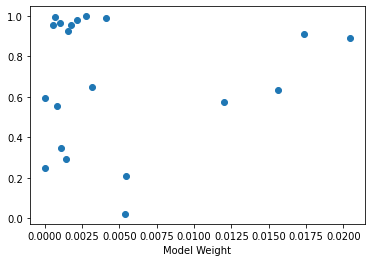

In [ ]:
x = spec_consistency_weights['Average Group Model Weight']
y = spec_consistency_weights['COS']
plt.scatter(x, y)
plt.xlabel("Model Weight")
plt.ylabel("Cosine Similarity")
plt.show()

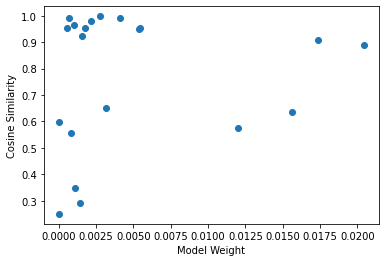

In [ ]:
x = spec_consistency_weights['Average Group Model Weight']
y = spec_consistency_weights['Updated COS']
plt.scatter(x, y)
plt.xlabel("Model Weight")
plt.ylabel("Cosine Similarity")
plt.show()